<a href="https://colab.research.google.com/github/Shubham01-T/LiveCryptoPriceTracker/blob/main/LiveCryptoPriceTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c79637f6-a54b-4195-bb3c-db494bcbffdc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2025-08-07T15:53:12.361Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9456}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12279, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)


In [4]:
df= pd.json_normalize(data['data'])


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df['timestamp']=pd.to_datetime('now')

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12279,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.990322e+07,1.990322e+07,False,NaN,1,NaN,NaN,None,2025-08-07T15:52:00.000Z,116735.332264,5.920282e+10,4.9975,0.273369,1.316921,-1.307102,7.801386,10.098026,13.457172,2.323409e+12,60.6758,2.451442e+12,None,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666
1,1027,Ethereum,ETH,ethereum,10432,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207093e+08,1.207093e+08,True,NaN,2,NaN,NaN,None,2025-08-07T15:52:00.000Z,3833.083061,3.387565e+10,24.0737,0.420690,5.154196,1.239621,49.460866,52.428737,66.465303,4.626888e+11,12.0831,4.626888e+11,None,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666
2,52,XRP,XRP,xrp,1672,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,None,2025-08-07T15:52:00.000Z,3.062098,4.823597e+09,-4.4504,0.473828,2.600473,-1.121804,34.068452,34.117604,30.696780,1.816081e+11,4.7427,3.062098e+11,None,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666
3,825,Tether USDt,USDT,tether,140508,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.640397e+11,1.677832e+11,True,NaN,4,NaN,NaN,None,2025-08-07T15:51:00.000Z,1.000274,1.014914e+11,17.0926,0.008407,0.031981,0.029379,0.009665,-0.031609,0.029295,1.640847e+11,4.2825,1.678293e+11,None,2025-08-07T15:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-07 15:53:13.069666
4,1839,BNB,BNB,bnb,2659,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392881e+08,1.392881e+08,False,NaN,5,NaN,NaN,None,2025-08-07T15:52:00.000Z,773.869755,2.067091e+09,4.5524,0.239458,0.788905,-3.146422,17.553330,18.652204,22.046407,1.077909e+11,2.8150,1.077909e+11,None,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666
5,5426,Solana,SOL,solana,967,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.391325e+08,6.069009e+08,True,NaN,6,5.252369e+08,8.956922e+10,None,2025-08-07T15:51:00.000Z,170.531095,4.443625e+09,11.7664,-0.008728,1.550131,-3.607360,13.562720,13.136102,0.088444,9.193885e+10,2.3995,1.034955e+11,None,2025-08-07T15:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666
6,3408,USDC,USDC,usd-coin,30314,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.460551e+10,6.460551e+10,False,NaN,7,6.090122e+10,6.089929e+10,None,2025-08-07T15:51:00.000Z,0.999968,1.217511e+10,10.8712,0.013008,0.012520,0.000145,-0.010132,-0.001414,0.003279,6.460346e+10,1.6861,6.460346e+10,None,2025-08-07T15:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-07 15:53:13.069666
7,1958,TRON,TRX,tron,1212,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.470181e+10,9.470183e+10,True,NaN,8,7.165966e+10,2.441735e+10,None,2025-08-07T15:52:00.000Z,0.340741,8.878173e+08,-5.6062,0.119564,1.901259,3.678650,18.913298,19.446362,30.076706,3.226875e+10,0.8427,3.226876e+10,None,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666
8,74,Dogecoin,DOGE,dogecoin,1270,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medi

In [8]:
import os
import pandas as pd
import json
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start': '1',
      'limit': '15',
      'convert': 'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Error: {e}")
        return  # Exit the function if there's an issue with the request

    # Normalize and add timestamp to the data
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')

    # Concatenate to the global dataframe `df`
    if 'df' not in globals():
        df = pd.DataFrame()  # Initialize df if it doesn't exist yet

    df = pd.concat([df, df2], ignore_index=True)

    # Define the CSV file path
    csv_file = 'cryptocurrency_data.csv'

    # Check if the file exists, then append, otherwise create a new file
    if os.path.exists(csv_file):
        df.to_csv(csv_file, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_file, mode='w', header=True, index=False)

    print(f"Data saved to {csv_file}")


In [9]:
import os
from time import time
from time import sleep

for i in range(333):
  api_runner()
  print("API Runner Completed Successfully!")
  sleep(60)
exit()

Data saved to cryptocurrency_data.csv
API Runner Completed Successfully!
Data saved to cryptocurrency_data.csv
API Runner Completed Successfully!
Data saved to cryptocurrency_data.csv
API Runner Completed Successfully!


KeyboardInterrupt: 

In [10]:
df12 = pd.read_csv('cryptocurrency_data.csv')
df12

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12279,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.990322e+07,1.990322e+07,False,NaN,1,NaN,NaN,NaN,2025-08-07T15:52:00.000Z,116735.332264,5.920282e+10,4.9975,0.273369,1.316921,-1.307102,7.801386,10.098026,13.457172,2.323409e+12,60.6758,2.451442e+12,NaN,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666,NaN
1,1027,Ethereum,ETH,ethereum,10432,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207093e+08,1.207093e+08,True,NaN,2,NaN,NaN,NaN,2025-08-07T15:52:00.000Z,3833.083061,3.387565e+10,24.0737,0.420690,5.154196,1.239621,49.460866,52.428737,66.465303,4.626888e+11,12.0831,4.626888e+11,NaN,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666,NaN
2,52,XRP,XRP,xrp,1672,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.930839e+10,9.998588e+10,False,NaN,3,NaN,NaN,NaN,2025-08-07T15:52:00.000Z,3.062098,4.823597e+09,-4.4504,0.473828,2.600473,-1.121804,34.068452,34.117604,30.696780,1.816081e+11,4.7427,3.062098e+11,NaN,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666,NaN
3,825,Tether USDt,USDT,tether,140508,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.640397e+11,1.677832e+11,True,NaN,4,NaN,NaN,NaN,2025-08-07T15:51:00.000Z,1.000274,1.014914e+11,17.0926,0.008407,0.031981,0.029379,0.009665,-0.031609,0.029295,1.640847e+11,4.2825,1.678293e+11,NaN,2025-08-07T15:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-07 15:53:13.069666,NaN
4,1839,BNB,BNB,bnb,2659,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.392881e+08,1.392881e+08,False,NaN,5,NaN,NaN,NaN,2025-08-07T15:52:00.000Z,773.869755,2.067091e+09,4.5524,0.239458,0.788905,-3.146422,17.553330,18.652204,22.046407,1.077909e+11,2.8150,1.077909e+11,NaN,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,32196,Hyperliquid,HYPE,hyperliquid,124,2024-07-15T10:14:50.000Z,"['decentralized-exchange-dex-token', 'defi', '...",1.000000e+09,3.339282e+08,9.999939e+08,False,NaN,11,3.339317e+08,1.319150e+10,NaN,2025-08-07T15:54:00.000Z,39.503596,1.945475e+08,-8.8145,0.143868,2.253028,-9.791055,4.705608,12.366764,59.788515,1.319136e+10,0.3445,3.950360e+10,NaN,2025-08-07T15:54:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,NaN,2025-08-07 15:55:13.567299
131,20947,Sui,SUI,sui,739,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",1.000000e+10,3.511924e+09,1.000000e+10,False,NaN,12,3.511924e+09,1.309297e+10,NaN,2025-08-07T15:53:00.000Z,3.728145,1.382411e+09,54.4384,0.016435,7.565940,-0.812559,29.464212,15.698495,-4.858373,1.309297e+10,0.3419,3.728145e+10,NaN,2025-08-07T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:55:13.567299
132,512,Stellar,XLM,stellar,737,2014-08-05T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",5.000181e+10,3.125795e+10,5.000179e+10,False,NaN,13,3.153141e+10,1.300238e+10,NaN,2025-08-07T15:54:00.000Z,0.412363,3.139293e+08,1.2880,0.170696,4.118081,0.528097,62.

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df12.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12279,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19903218.00,19903218.00,False,NaN,1,NaN,NaN,NaN,2025-08-07T15:52:00.000Z,116735.33,59202823427.56,5.00,0.27,1.32,-1.31,7.80,10.10,13.46,2323408766359.80,60.68,2451441977551.36,NaN,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666,NaN
1,1027,Ethereum,ETH,ethereum,10432,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120709318.98,120709318.98,True,NaN,2,NaN,NaN,NaN,2025-08-07T15:52:00.000Z,3833.08,33875649347.99,24.07,0.42,5.15,1.24,49.46,52.43,66.47,462688845855.70,12.08,462688845855.70,NaN,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666,NaN
2,52,XRP,XRP,xrp,1672,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,59308385925.00,99985880506.00,False,NaN,3,NaN,NaN,NaN,2025-08-07T15:52:00.000Z,3.06,4823596697.80,-4.45,0.47,2.60,-1.12,34.07,34.12,30.70,181608101837.90,4.74,306209820087.76,NaN,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666,NaN
3,825,Tether USDt,USDT,tether,140508,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,164039701141.81,167783241740.71,True,NaN,4,NaN,NaN,NaN,2025-08-07T15:51:00.000Z,1.00,101491389779.20,17.09,0.01,0.03,0.03,0.01,-0.03,0.03,164084721467.97,4.28,167829289473.15,NaN,2025-08-07T15:51:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-07 15:53:13.069666,NaN
4,1839,BNB,BNB,bnb,2659,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,139288114.30,139288114.30,False,NaN,5,NaN,NaN,NaN,2025-08-07T15:52:00.000Z,773.87,2067090619.26,4.55,0.24,0.79,-3.15,17.55,18.65,22.05,107790858828.96,2.81,107790858828.96,NaN,2025-08-07T15:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-07 15:53:13.069666,NaN


In [21]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.27,1.32,-1.29,7.82,10.12,13.46
Ethereum,0.40,5.07,1.25,49.52,52.47,66.44
XRP,0.48,2.59,-1.14,34.06,34.15,30.64
Tether USDt,0.01,0.03,0.04,0.01,-0.03,0.04
BNB,0.24,0.79,-3.15,17.56,18.67,22.01
Solana,-0.04,1.47,-3.66,13.51,13.08,-0.02
USDC,0.01,0.01,0.00,-0.01,0.00,0.01
TRON,0.12,1.90,3.69,18.91,19.45,30.08
Dogecoin,0.45,5.24,-1.61,26.38,16.11,5.11


In [22]:
df4 = df3.stack()


In [23]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin      quote.USD.percent_change_1h     0.27
             quote.USD.percent_change_24h    1.32
             quote.USD.percent_change_7d    -1.29
             quote.USD.percent_change_30d    7.82
             quote.USD.percent_change_60d   10.12
...                                           ...
Bitcoin Cash quote.USD.percent_change_24h    1.62
             quote.USD.percent_change_7d     0.65
             quote.USD.percent_change_30d   14.33
             quote.USD.percent_change_60d   38.18
             quote.USD.percent_change_90d   41.68

[90 rows x 1 columns]

In [24]:
df5.count()


,0
values,90


In [26]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6



,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.27
1,Bitcoin,quote.USD.percent_change_24h,1.32
2,Bitcoin,quote.USD.percent_change_7d,-1.29
3,Bitcoin,quote.USD.percent_change_30d,7.82
4,Bitcoin,quote.USD.percent_change_60d,10.12
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,1.62
86,Bitcoin Cash,quote.USD.percent_change_7d,0.65
87,Bitcoin Cash,quote.USD.percent_change_30d,14.33
88,Bitcoin Cash,quote.USD.percent_change_60d,38.18


In [28]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.27
1,Bitcoin,quote.USD.percent_change_24h,1.32
2,Bitcoin,quote.USD.percent_change_7d,-1.29
3,Bitcoin,quote.USD.percent_change_30d,7.82
4,Bitcoin,quote.USD.percent_change_60d,10.12
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,1.62
86,Bitcoin Cash,quote.USD.percent_change_7d,0.65
87,Bitcoin Cash,quote.USD.percent_change_30d,14.33
88,Bitcoin Cash,quote.USD.percent_change_60d,38.18


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.27
1,Bitcoin,24h,1.32
2,Bitcoin,7d,-1.29
3,Bitcoin,30d,7.82
4,Bitcoin,60d,10.12
...,...,...,...
85,Bitcoin Cash,24h,1.62
86,Bitcoin Cash,7d,0.65
87,Bitcoin Cash,30d,14.33
88,Bitcoin Cash,60d,38.18


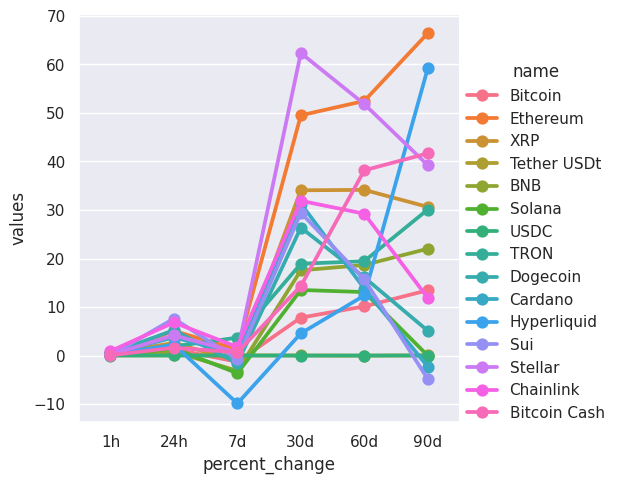

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [46]:
#If you are intrested in only some of the cryptos not all of them
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,116735.33,2025-08-07 15:53:13.069666
15,Bitcoin,116735.33,NaT
30,Bitcoin,116763.92,NaT
45,Bitcoin,116763.92,NaT
